----
# **RECOMMENTATION SYSYTEM**
-----

### OBJECTIVE :

#### - Implement a recommendation system using cosine similarity on an anime dataset

### TASKS :

##### DATA PREPROCESSING :

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.metrics.pairwise import cosine_similarity  # compute the similarity between anime to recommend similar anime

In [8]:
from sklearn.preprocessing import MultiLabelBinarizer,MinMaxScaler #genre into binary, # range btw 0 to 1 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score , recall_score , f1_score

In [10]:
df=pd.read_csv('anime.csv')

In [11]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [13]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [14]:
df['genre'].fillna('unknown',inplace=True)
df['type'].fillna('unknown',inplace=True)
m_rating=df['rating'].median()
df['rating'].fillna(m_rating,inplace=True)

In [15]:
df.describe()

,anime_id,rating,members
count,12294.000000,12294.000000,1.229400e+04
mean,14058.221653,6.475700,1.807134e+04
std,11455.294701,1.017179,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.900000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.170000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


#### FOR MORE UNDERSTANDING :

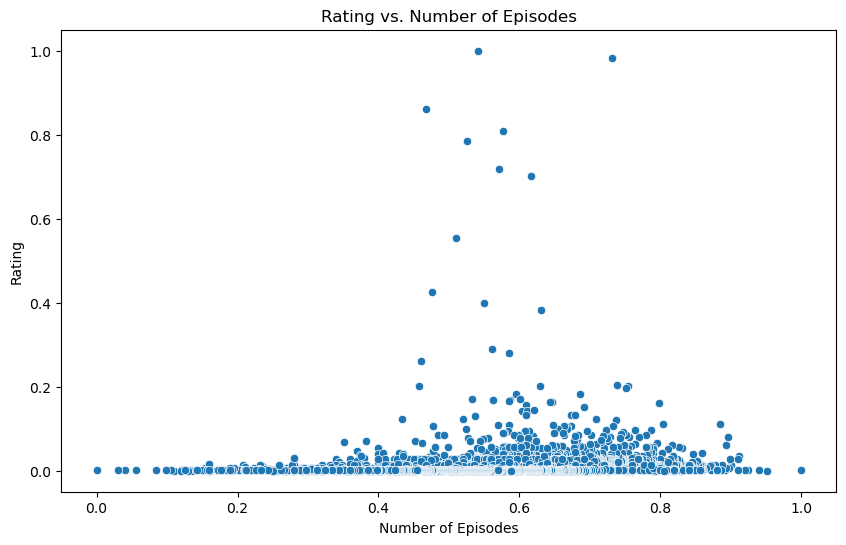

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(y='episodes', x='rating', data=df)
plt.title('Rating vs. Number of Episodes')
plt.xlabel('Number of Episodes')
plt.ylabel('Rating')
plt.show()

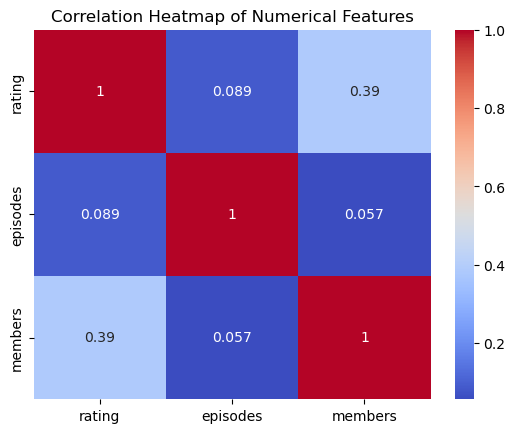

In [18]:
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce').fillna(0)

corr_matrix = df[['rating', 'episodes', 'members']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

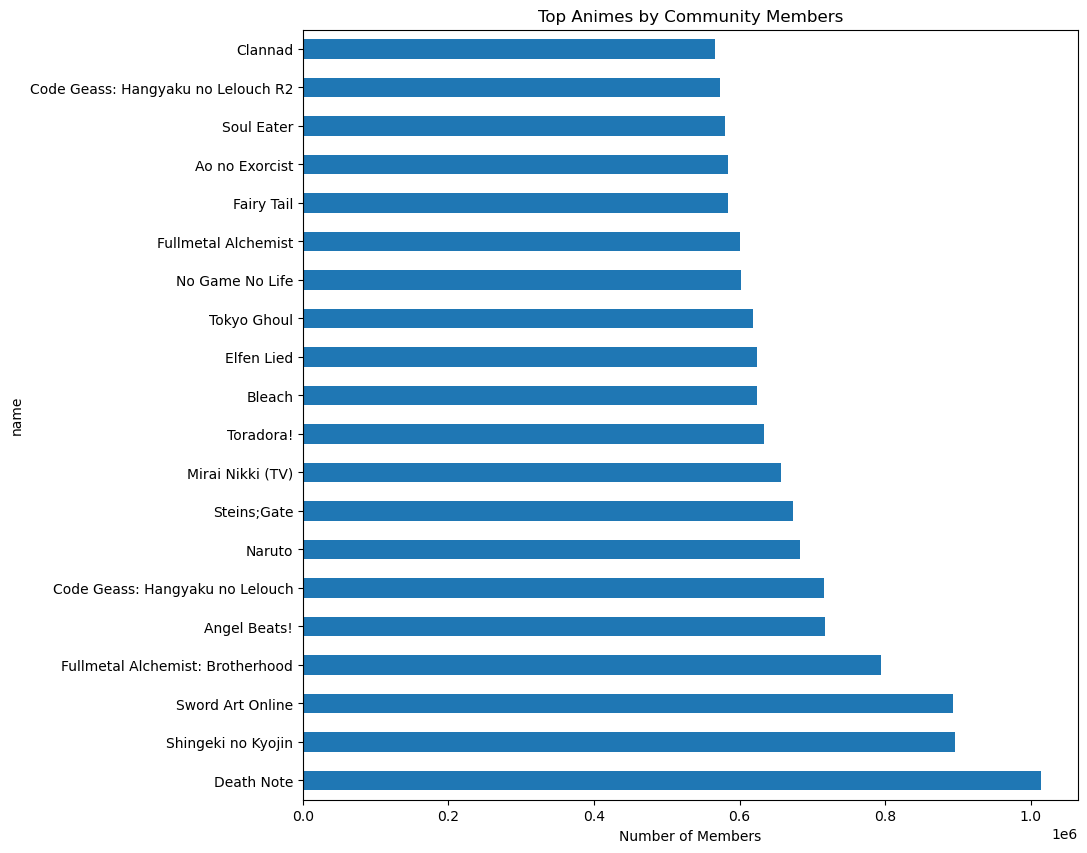

In [19]:
top_animes = df.nlargest(20, 'members')
top_animes.plot(x='name', y='members', kind='barh', figsize=(10,10), legend=False)
plt.title('Top Animes by Community Members')
plt.xlabel('Number of Members')
plt.show()

#### ONE-HOT ENCODING :

In [20]:
df['genre']= df['genre'].apply(lambda x: x.split(','))             # Split genre strings into lists

In [149]:
mlb=MultiLabelBinarizer()                                          # Initialize MultiLabelBinarizer to handle multiple genres
g_en=mlb.fit_transform(df['genre'])                                # One-hot encode genres
g_df=pd.DataFrame(g_en,columns=mlb.classes_)                       # Create a DataFrame from the one-hot encoded genre matrix

In [21]:
scaler=MinMaxScaler()                                              # Scale numerical features
df[['rating','episodes','members']]=scaler.fit_transform(df[['rating','episodes','members']])

In [22]:
a_df=pd.concat([df[['rating','episodes','members']],g_df],axis=1)  # Combine scaled features with one-hot encoded genres

In [23]:
a_df

,rating,episodes,members,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,...,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,unknown
0,0.924370,0.000550,0.197872,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.911164,0.035204,0.782770,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.909964,0.028053,0.112689,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.900360,0.013201,0.664325,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.899160,0.028053,0.149186,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0.297719,0.000550,0.000203,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12290,0.313325,0.000550,0.000176,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12291,0.385354,0.002200,0.000211,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12292,0.397359,0.000550,0.000168,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
c_s=cosine_similarity(a_df)                                                # Compute cosine similarity  

#### RECOMMENTATION FUNTION :

In [134]:
def recommend_anime(anime_title, c_s=c_s, df=df, threshold=0.5, top_n=10): # Recommendation Function
    if anime_title not in df['name'].values:                               # Check if the anime is in the dataset
        return "Anime not found."
     
    idx = df.index[df['name'] == anime_title][0]                           # Get the index of the anime
    sim_scores = [(i, score) for i, score in enumerate(c_s[idx]) if score >= threshold]# Find all anime with similarity
                                                                                       # scores above the threshold    
    return df['name'].iloc[[i for i, _ in sorted(sim_scores[1:top_n+1], key=lambda x: x[1], reverse=True)]]
                      # Sort the similar anime by score and return the top_n recommendations

#### USER INPUT RECOMMENTATION :

In [118]:
def get_anime_recommendations():                                             # Function for user input & print anime's
    anime_title = input("Enter the anime title: ")                           # ask for input
    recommended_list = recommend_anime(anime_title, threshold=0.6, top_n=10) # Get recommentation on input
    print(f"\nTop 10 anime recommendations for '{anime_title}':")            # print 
    for i, anime in enumerate(recommended_list, 1):
        print(f"{i}. {anime}")
        
get_anime_recommendations()                                                  #fun call

Enter the anime title:  Naruto



Top 10 anime recommendations for 'Naruto':
1. Katekyo Hitman Reborn!
2. Boku no Hero Academia
3. One Piece
4. Ansatsu Kyoushitsu (TV) 2nd Season
5. Hunter x Hunter
6. Yuu☆Yuu☆Hakusho
7. Hunter x Hunter: Greed Island Final
8. Hunter x Hunter OVA
9. Shingeki no Kyojin
10. Samurai Champloo


#### EVALUVATING EACH FUNCTION SYSTEM PERFORMANCE :

In [91]:
train_data,test_data=train_test_split(df,test_size=0.2,random_state=42)   #Slipt data into traning and test sets

In [145]:
def evaluate_recommendations(test_data, top_n=10):                        # Fun to system performance 
    y_true = []                                                           # Store true value
    y_pred = []                                                           # Store predicted values
    
    for idx, test_anime in test_data.iterrows():                          # loop through each anime in test data
        recs = recommend_anime(test_anime['name'], top_n=top_n)           # get recommented data 

        true_genres = set(test_anime['genre'])                            # Get true and predicted genres directly
        pred_genres = set(train_data[train_data['name'].isin(recs)]['genre'].explode())

        y_true.append(1 if true_genres & pred_genres else 0)               # Append 1 if there is an intersection btw
        y_pred.append(1)                                                   #  true and predicted genres

    precision = sum(y_true) / len(y_pred)                                  
    recall = sum(y_true) / len(test_data)                                  
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    
    return precision, recall, f1

In [143]:
precision, recall, f1 = evaluate_recommendations(test_data, top_n=10)
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

Precision: 1.00, Recall: 1.00, F1-Score: 1.00


-------
## Interview Questions :

### 1. Can you explain the difference between user-based and item-based collaborative filtering?

### 2. What is collaborative filtering, and how does it work?